In [1]:
import pandas as pd
import nltk
import unicodedata
import sys
import string
nltk.download('vader_lexicon')
import time
import csv

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\glori\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import matplotlib.pyplot as plt

In [80]:
df_clothes = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [81]:
df_clothes.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df_clothes.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [9]:
df_clothes.describe(include=['O'])

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


In [6]:
df_clothes.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
df_clothes.shape

(23486, 11)

In [82]:
df_clothes.dropna(inplace=True)

In [9]:
df_clothes.shape

(19662, 11)

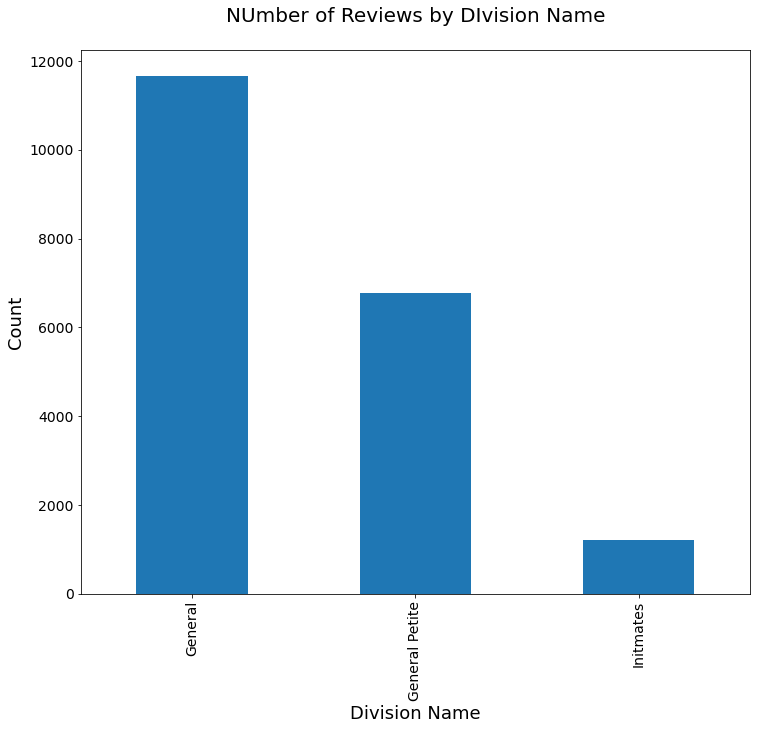

In [97]:
ax = df_clothes['Division Name'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('NUmber of Reviews by DIvision Name\n', fontsize=20)
ax.set_xlabel('Division Name', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

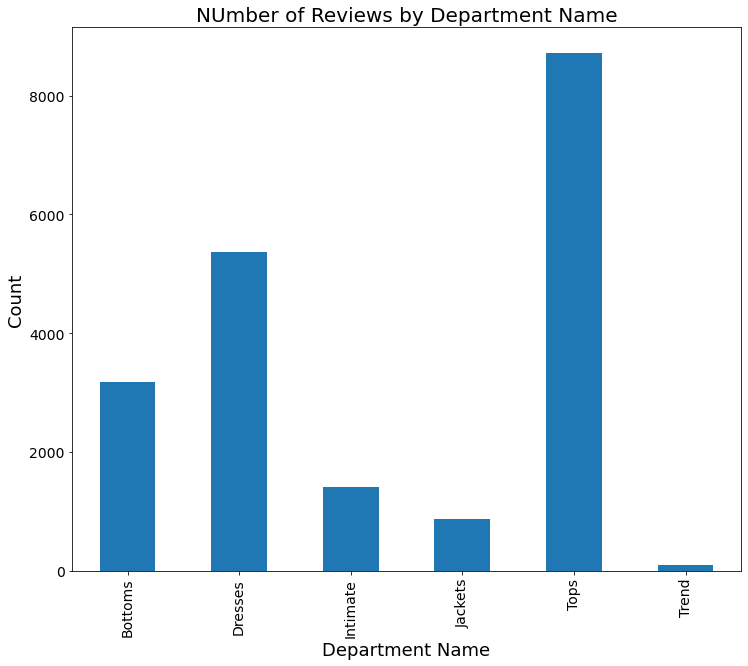

In [98]:
ax = df_clothes['Department Name'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('NUmber of Reviews by Department Name', fontsize=20)
ax.set_xlabel('Department Name', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

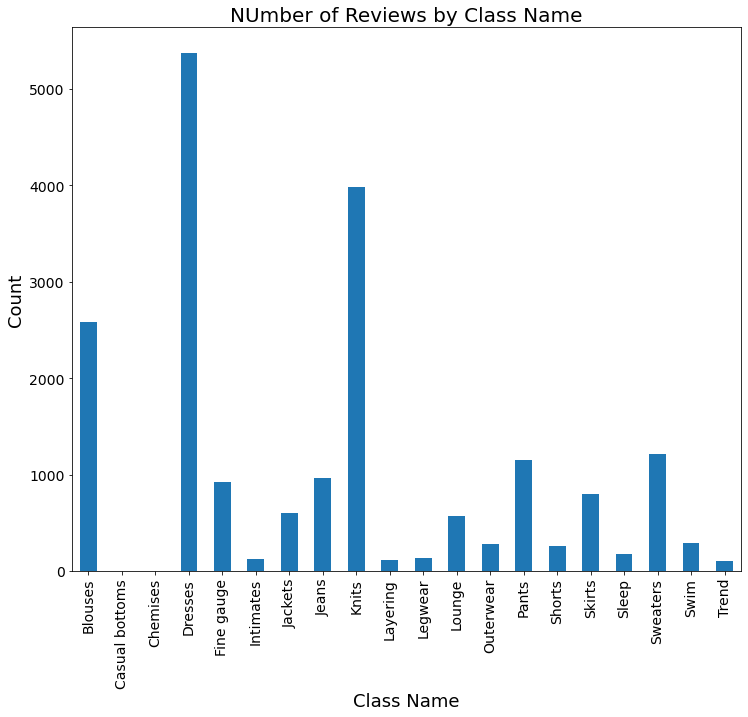

In [25]:
ax = df_clothes['Class Name'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('NUmber of Reviews by Class Name', fontsize=20)
ax.set_xlabel('Class Name', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

In [11]:
import seaborn as sns

Text(0.5, 0.98, 'Class Name and Ratings')

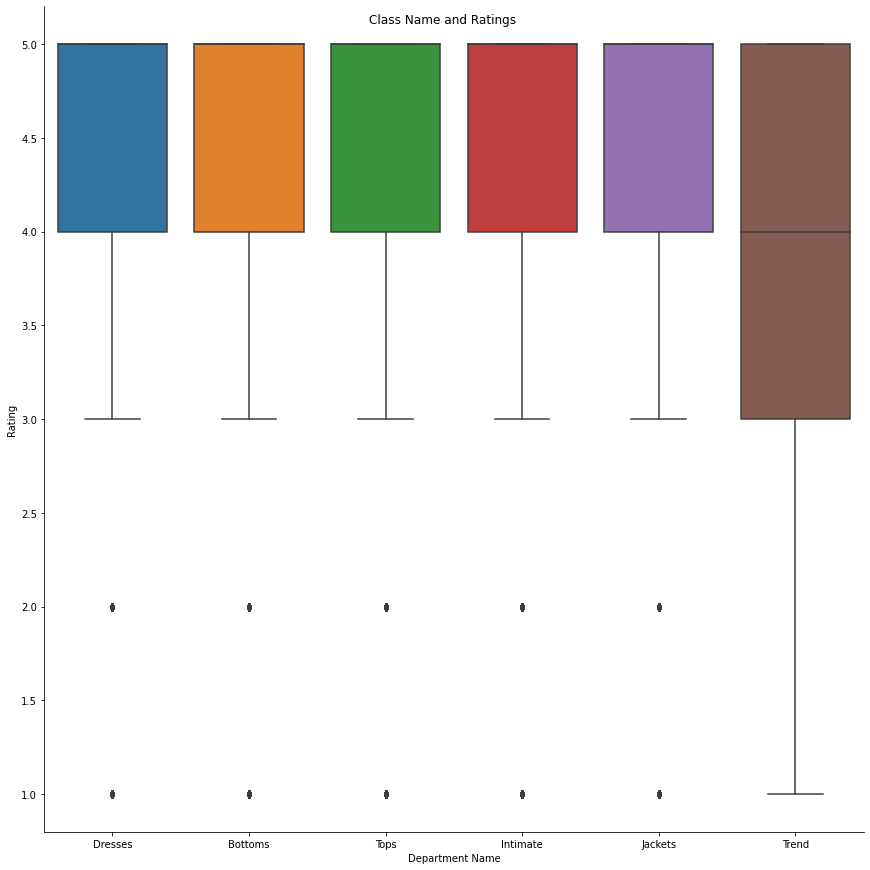

In [29]:
ax = sns.catplot(x='Department Name', y='Rating', kind = 'box', data = df_clothes, height=12, aspect=1)
ax.fig.suptitle('Class Name and Ratings')

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

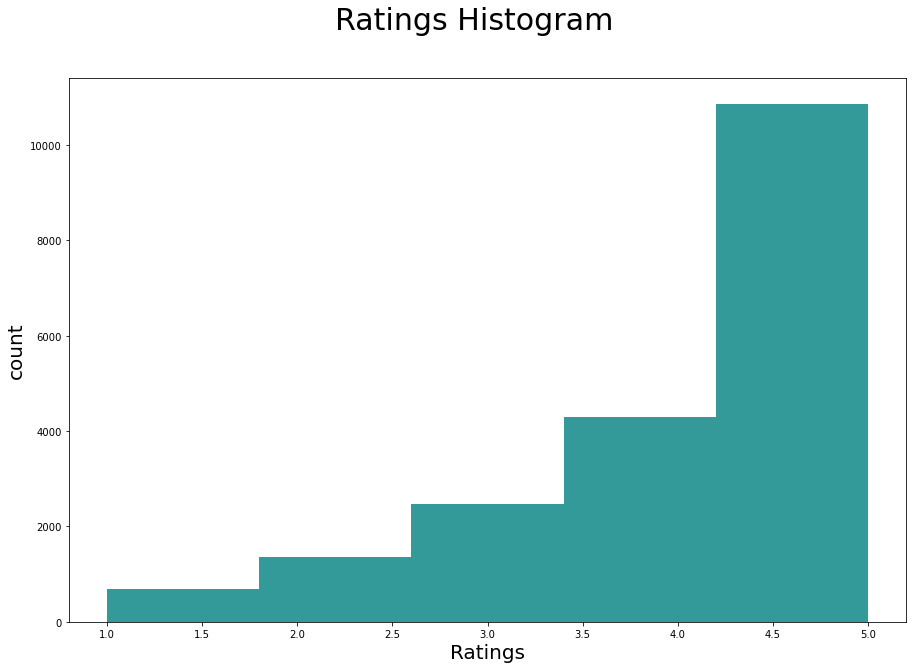

In [99]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots()


plt.hist(df_clothes['Rating'], bins=5, color="teal", alpha=0.8)
plt.xlabel("Ratings", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.suptitle("Ratings Histogram", fontsize=30)

plt.show()

In [32]:
import re

In [83]:
df_clothes['Review Text'] = df_clothes['Review Text'].apply(lambda x: (re.sub('@[^\s]+-,','', x)))

In [84]:
df_clothes['Review Text'] = df_clothes['Review Text'].apply(lambda x: re.sub(r'\B#\w*[a-zA-Z]+\w*', '', x))

In [85]:
df_clothes['Review Text'] = df_clothes['Review Text'].str.lower()

In [86]:
df_clothes['Review Text']

2        i had such high hopes for this dress and reall...
3        i love, love, love this jumpsuit. it's fun, fl...
4        this shirt is very flattering to all due to th...
5        i love tracy reese dresses, but this one is no...
6        i aded this in my basket at hte last mintue to...
                               ...                        
23481    i was very happy to snag this dress at such a ...
23482    it reminds me of maternity clothes. soft, stre...
23483    this fit well, but the top was very see throug...
23484    i bought this dress for a wedding i have this ...
23485    this dress in a lovely platinum is feminine an...
Name: Review Text, Length: 19662, dtype: object

In [64]:
#import libraries

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [55]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\glori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\glori\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [74]:
df_clothes["Review Text"]

2        [i, had, such, high, hopes, for, this, dress, ...
3        [i, love,, love,, love, this, jumpsuit., it's,...
4        [this, shirt, is, very, flattering, to, all, d...
5        [i, love, tracy, reese, dresses,, but, this, o...
6        [i, aded, this, in, my, basket, at, hte, last,...
                               ...                        
23481    [i, was, very, happy, to, snag, this, dress, a...
23482    [it, reminds, me, of, maternity, clothes., sof...
23483    [this, fit, well,, but, the, top, was, very, s...
23484    [i, bought, this, dress, for, a, wedding, i, h...
23485    [this, dress, in, a, lovely, platinum, is, fem...
Name: Review Text, Length: 19662, dtype: object

In [69]:
stop = stopwords.words('english')

In [87]:
df_clothes["rev_no_stopw"] = df_clothes['Review Text'].apply(lambda x:
                                                            ' '.join([word for word in x.split() if word not in (stop)]))

In [88]:
df_clothes.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,rev_no_stopw
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work me. initia...
3,3,1049,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"love, love, love jumpsuit. fun, flirty, fabulo..."
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie. per...
5,5,1080,49,Not for the very petite,"i love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"love tracy reese dresses, one petite. 5 feet t..."
6,6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...


In [89]:
analyzer= SentimentIntensityAnalyzer()
#{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

In [91]:
df_clothes['Compound'] = [analyzer.polarity_scores(a)['compound'] for a in df_clothes["rev_no_stopw"]]
df_clothes['Negative'] = [analyzer.polarity_scores(a)['neg'] for a in df_clothes["rev_no_stopw"]]
df_clothes['Positive'] = [analyzer.polarity_scores(a)['pos'] for a in df_clothes["rev_no_stopw"]]
df_clothes['Neutral'] = [analyzer.polarity_scores(a)['neu'] for a in df_clothes["rev_no_stopw"]]

In [92]:
df_clothes.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,rev_no_stopw,Compound,Negative,Positive,Neutral
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work me. initia...,0.9117,0.036,0.259,0.705
3,3,1049,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"love, love, love jumpsuit. fun, flirty, fabulo...",0.9511,0.163,0.631,0.206
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie. per...,0.9213,0.000,0.523,0.477
5,5,1080,49,Not for the very petite,"i love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"love tracy reese dresses, one petite. 5 feet t...",0.9153,0.000,0.257,0.743
6,6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...,0.8439,0.000,0.159,0.841


In [93]:
for a in df_clothes.Compound:
    df_clothes['Analysis'] = df_clothes.Compound.apply(lambda a: 'Positive' if a > 0 else ('Neutral' if a == 0 else 'Negative'))

In [95]:
df_clothes.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,rev_no_stopw,Compound,Negative,Positive,Neutral,Analysis
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes dress really wanted work me. initia...,0.9117,0.036,0.259,0.705,Positive
3,3,1049,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"love, love, love jumpsuit. fun, flirty, fabulo...",0.9511,0.163,0.631,0.206,Positive
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering due adjustable front tie. per...,0.9213,0.000,0.523,0.477,Positive
5,5,1080,49,Not for the very petite,"i love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"love tracy reese dresses, one petite. 5 feet t...",0.9153,0.000,0.257,0.743,Positive
6,6,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...,0.8439,0.000,0.159,0.841,Positive


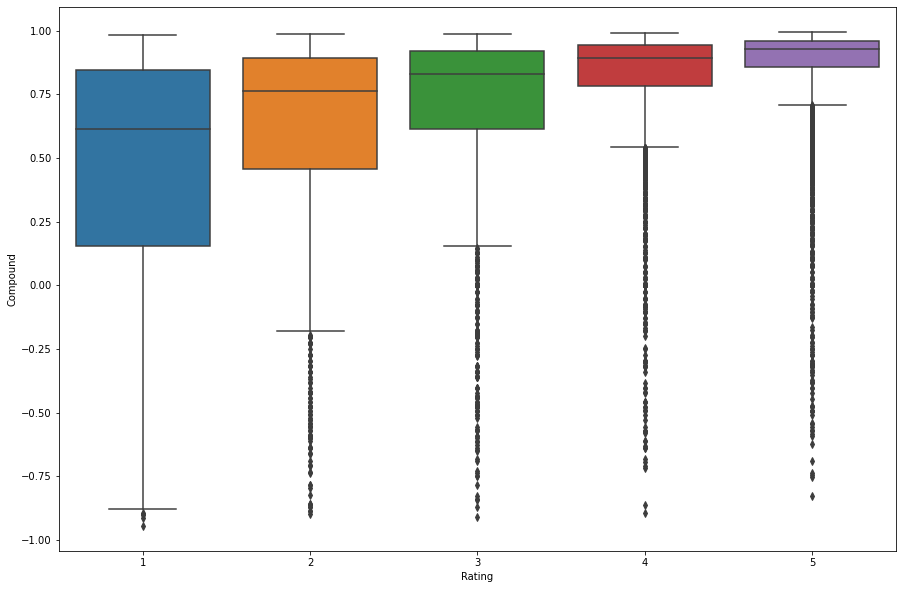

In [100]:
sns.boxplot(data=df_clothes, x='Rating', y='Compound')
plt.show()

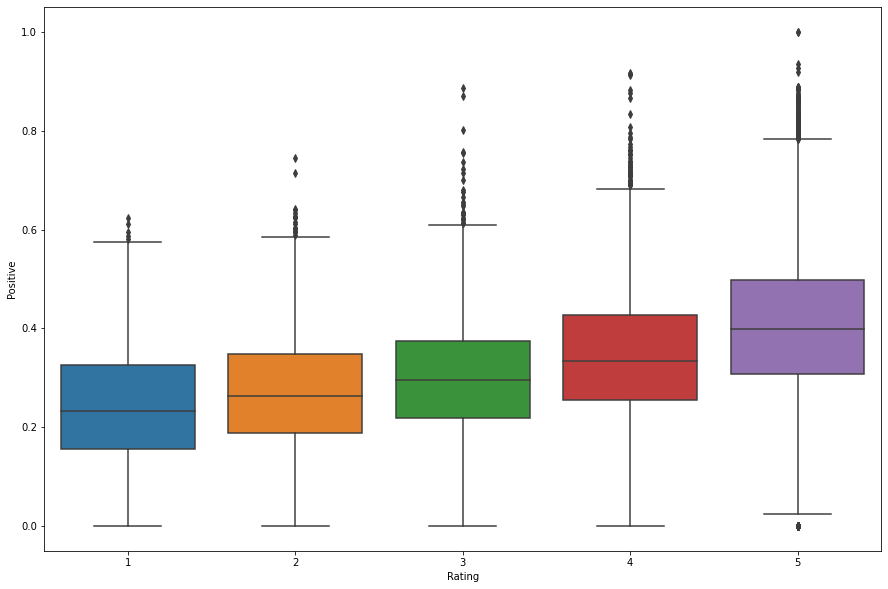

In [101]:
sns.boxplot(data=df_clothes, x='Rating', y='Positive')
plt.show()

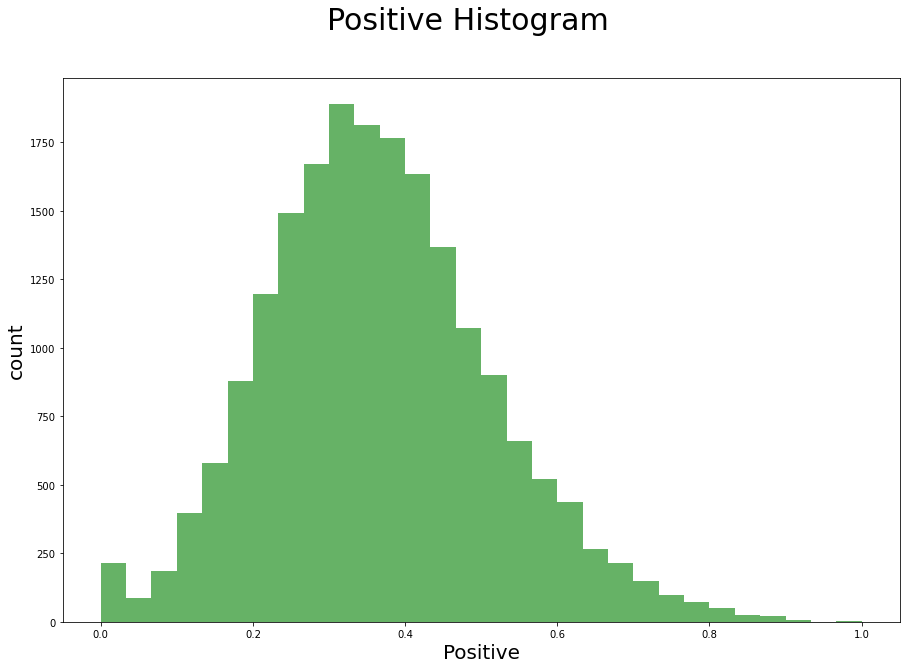

In [102]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots()


plt.hist(df_clothes['Positive'], bins=30, color="green", alpha=0.6)
plt.xlabel("Positive", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.suptitle("Positive Histogram", fontsize=30)

plt.show()

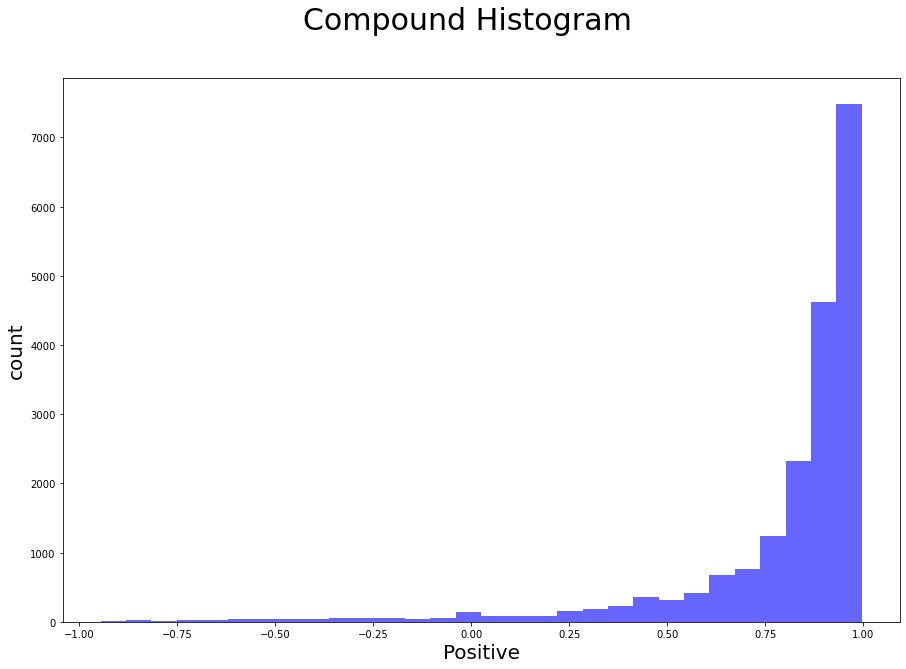

In [103]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots()


plt.hist(df_clothes['Compound'], bins=30, color="blue", alpha=0.6)
plt.xlabel("Positive", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.suptitle("Compound Histogram", fontsize=30)

plt.show()

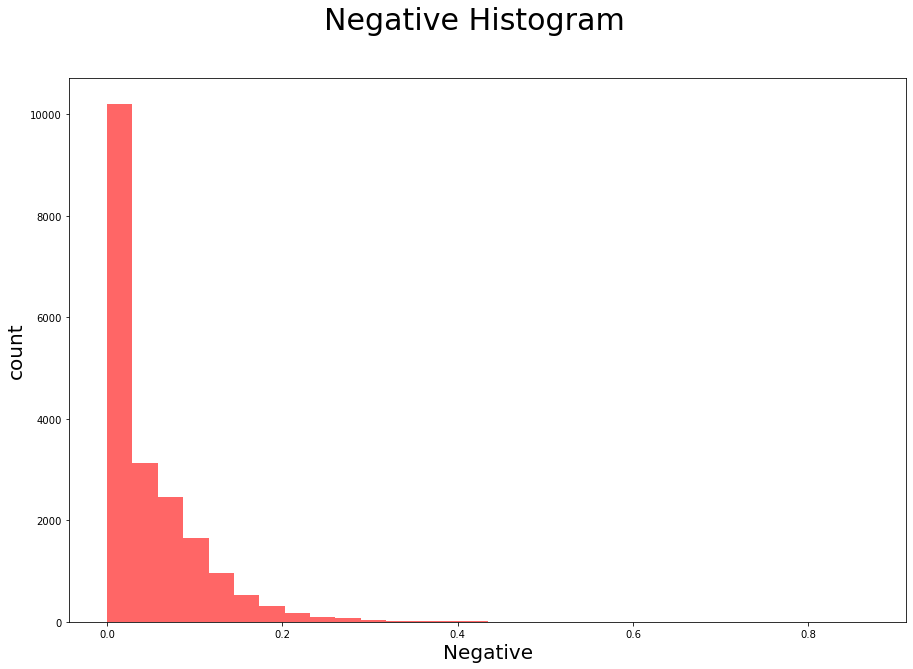

In [104]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots()


plt.hist(df_clothes['Negative'], bins=30, color="red", alpha=0.6)
plt.xlabel("Negative", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.suptitle("Negative Histogram", fontsize=30)

plt.show()

In [105]:
df_clothes.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Compound,Negative,Positive,Neutral
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,11755.260655,921.297274,43.260808,4.183145,0.818177,2.652477,0.803161,0.043831,0.365386,0.590783
std,6772.063092,200.227528,12.258122,1.112224,0.385708,5.834285,0.272994,0.060060,0.148004,0.138490
min,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000,-0.945000,0.000000,0.000000,0.000000
25%,5888.250000,861.000000,34.000000,4.000000,1.000000,0.000000,0.784500,0.000000,0.264000,0.506000
50%,11749.500000,936.000000,41.000000,5.000000,1.000000,1.000000,0.905900,0.000000,0.356000,0.598000
75%,17624.750000,1078.000000,52.000000,5.000000,1.000000,3.000000,0.951500,0.073000,0.456000,0.683000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,0.995300,0.868000,1.000000,1.000000


In [106]:
df_clothes.drop(columns=["Unnamed: 0", "Clothing ID"], inplace = True)

In [107]:
df_clothes.drop(columns=["Recommended IND"], inplace = True)

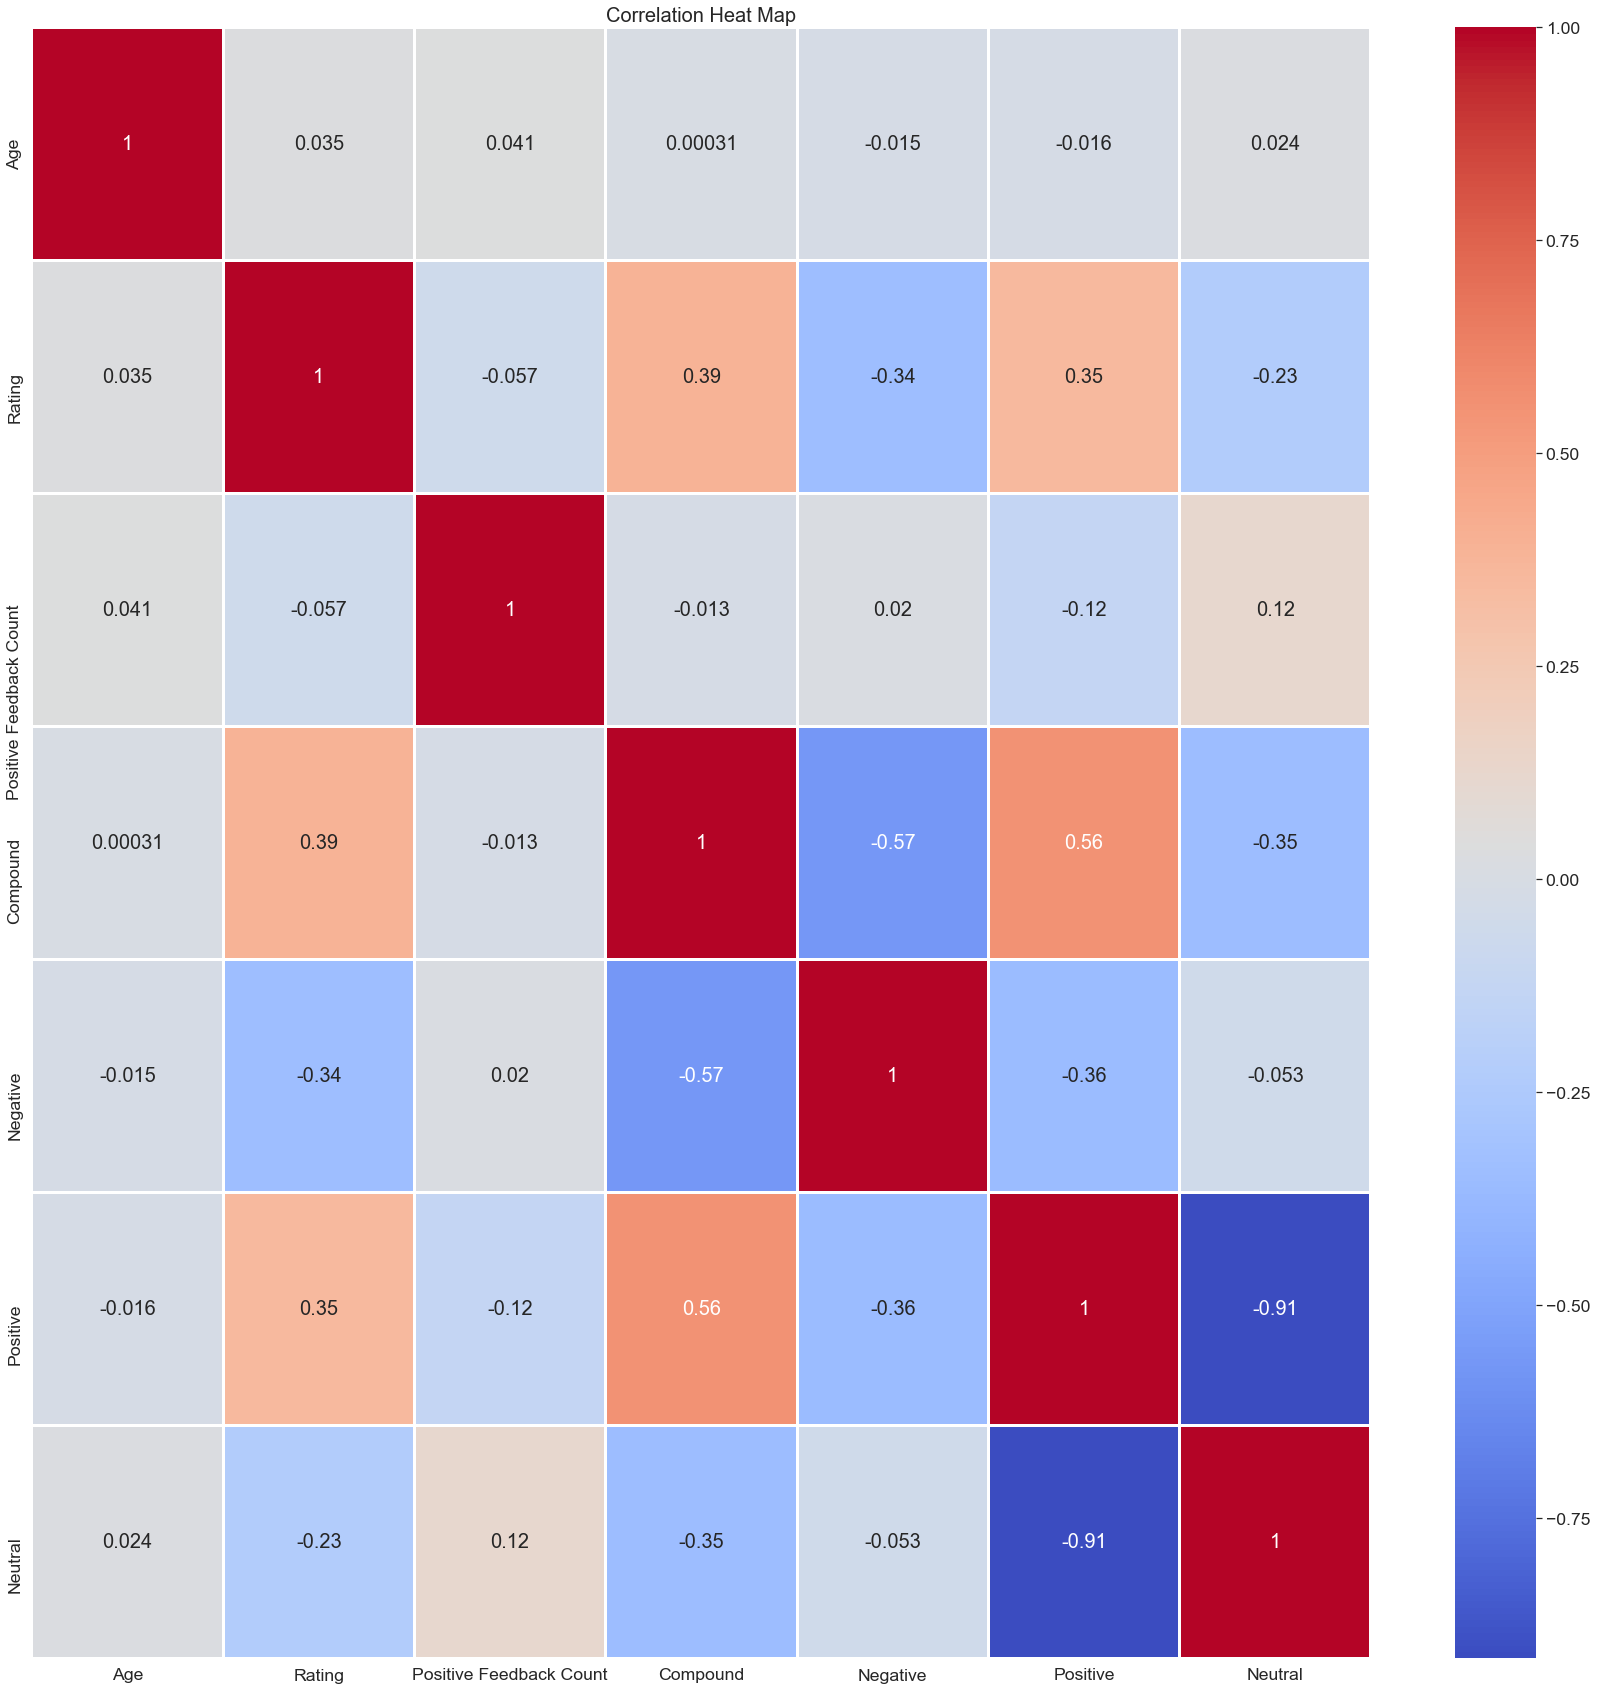

In [110]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots()
fig.set_size_inches(30, 30)
sns.heatmap(df_clothes.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2, annot_kws={"size": 20})
plt.title('Correlation Heat Map', fontsize = 20)
plt.show()

In [68]:
df_clothes.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Positive Feedback Count',
       'Division Name', 'Department Name', 'Class Name', 'Compound',
       'Negative', 'Positive', 'Neutral', 'Analysis'],
      dtype='object')

In [204]:
df_model = df_clothes[['Age', 'Rating', 'Positive Feedback Count',
       'Division Name', 'Department Name', 'Class Name', 'Compound',
       'Negative', 'Positive', 'Neutral', 'Analysis']]

In [205]:
cat_columns = ['Division Name', 'Department Name', 'Class Name']
cat_dummies = [col for col in df_model
               if "__" in col 
               and col.split("__")[0] in cat_columns]
processed = pd.get_dummies(df_model, prefix_sep="__",
                              columns=cat_columns)

In [206]:
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [207]:
classifier = GaussianNB()

In [230]:
target = processed.Analysis

In [209]:
X_train, X_val, y_train, y_val = train_test_split(processed.loc[:, processed.columns != 'Analysis'],
                                                    target, test_size =0.50, random_state=22, stratify=processed['Analysis'])

In [210]:
classifier.fit(X_train, y_train)

GaussianNB()

In [211]:
y_pred = classifier.predict(X_val)

In [212]:
accuracy = 100.0 * (y_val == y_pred).sum() / X_val.shape[0]
print("Accuracy of Naive Bayes classifier =", round(accuracy, 2), "%")

Accuracy of Naive Bayes classifier = 93.49 %


In [213]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  25    2  254]
 [   1    1   61]
 [ 874   50 8563]]
              precision    recall  f1-score   support

    Negative       0.03      0.09      0.04       281
     Neutral       0.02      0.02      0.02        63
    Positive       0.96      0.90      0.93      9487

    accuracy                           0.87      9831
   macro avg       0.34      0.34      0.33      9831
weighted avg       0.93      0.87      0.90      9831

0.8736649374427831


In [95]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [141]:
#Code taken from datacam website
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [175]:
text = " ".join(review for review in df_clothes.rev_no_stopw.astype(str))
print ("There are {} words in the combination of all cells in column BLOOM.".format(len(text)))

There are 4054866 words in the combination of all cells in column BLOOM.


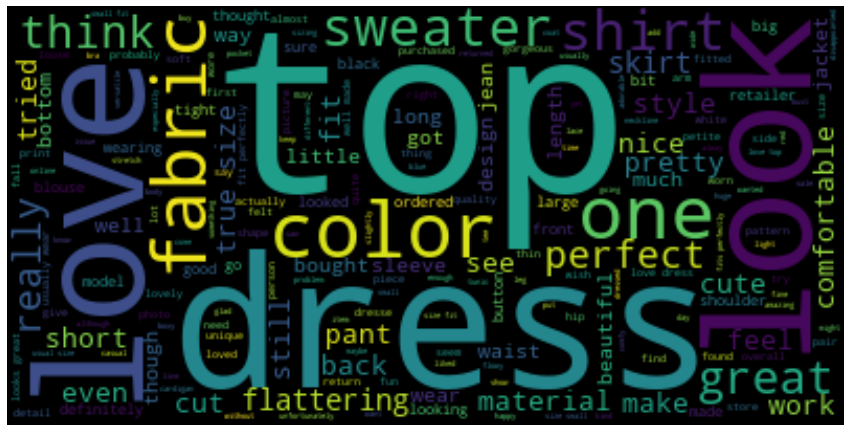

In [176]:
# Start with one review:
text = text

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Applying Sentiment with TextBlob

In [177]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [178]:
from textblob import TextBlob

In [182]:
def sentiment_func(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [183]:
df_clothes['sentiment_textblob'] = df_clothes['rev_no_stopw'].apply(sentiment_func)

In [185]:
df_clothes['Polarity'] = df_clothes['sentiment_textblob'].apply(lambda x: x[0])
df_clothes['Subjectivity'] = df_clothes['sentiment_textblob'].apply(lambda x: x[1])

In [186]:
df_clothes.head()

,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Class Name,rev_no_stopw,Compound,Negative,Positive,Neutral,Analysis,sentiment_textblob,Polarity,Subjectivity
2,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,high hopes dress really wanted work me. initia...,0.9117,0.036,0.259,0.705,Positive,"(0.07945887445887445, 0.3458658008658009)",0.079459,0.345866
3,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,"love, love, love jumpsuit. fun, flirty, fabulo...",0.9511,0.163,0.631,0.206,Positive,"(0.5499999999999999, 0.625)",0.550000,0.625000
4,47,Flattering shirt,this shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,shirt flattering due adjustable front tie. per...,0.9213,0.000,0.523,0.477,Positive,"(0.6171875, 0.6583333333333333)",0.617188,0.658333
5,49,Not for the very petite,"i love tracy reese dresses, but this one is no...",2,4,General,Dresses,Dresses,"love tracy reese dresses, one petite. 5 feet t...",0.9153,0.000,0.257,0.743,Positive,"(0.15, 0.5428571428571428)",0.150000,0.542857
6,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,aded basket hte last mintue see would look lik...,0.8439,0.000,0.159,0.841,Positive,"(0.1605, 0.5293333333333333)",0.160500,0.529333


In [187]:
df_f = df_clothes.drop(columns = "sentiment_textblob")

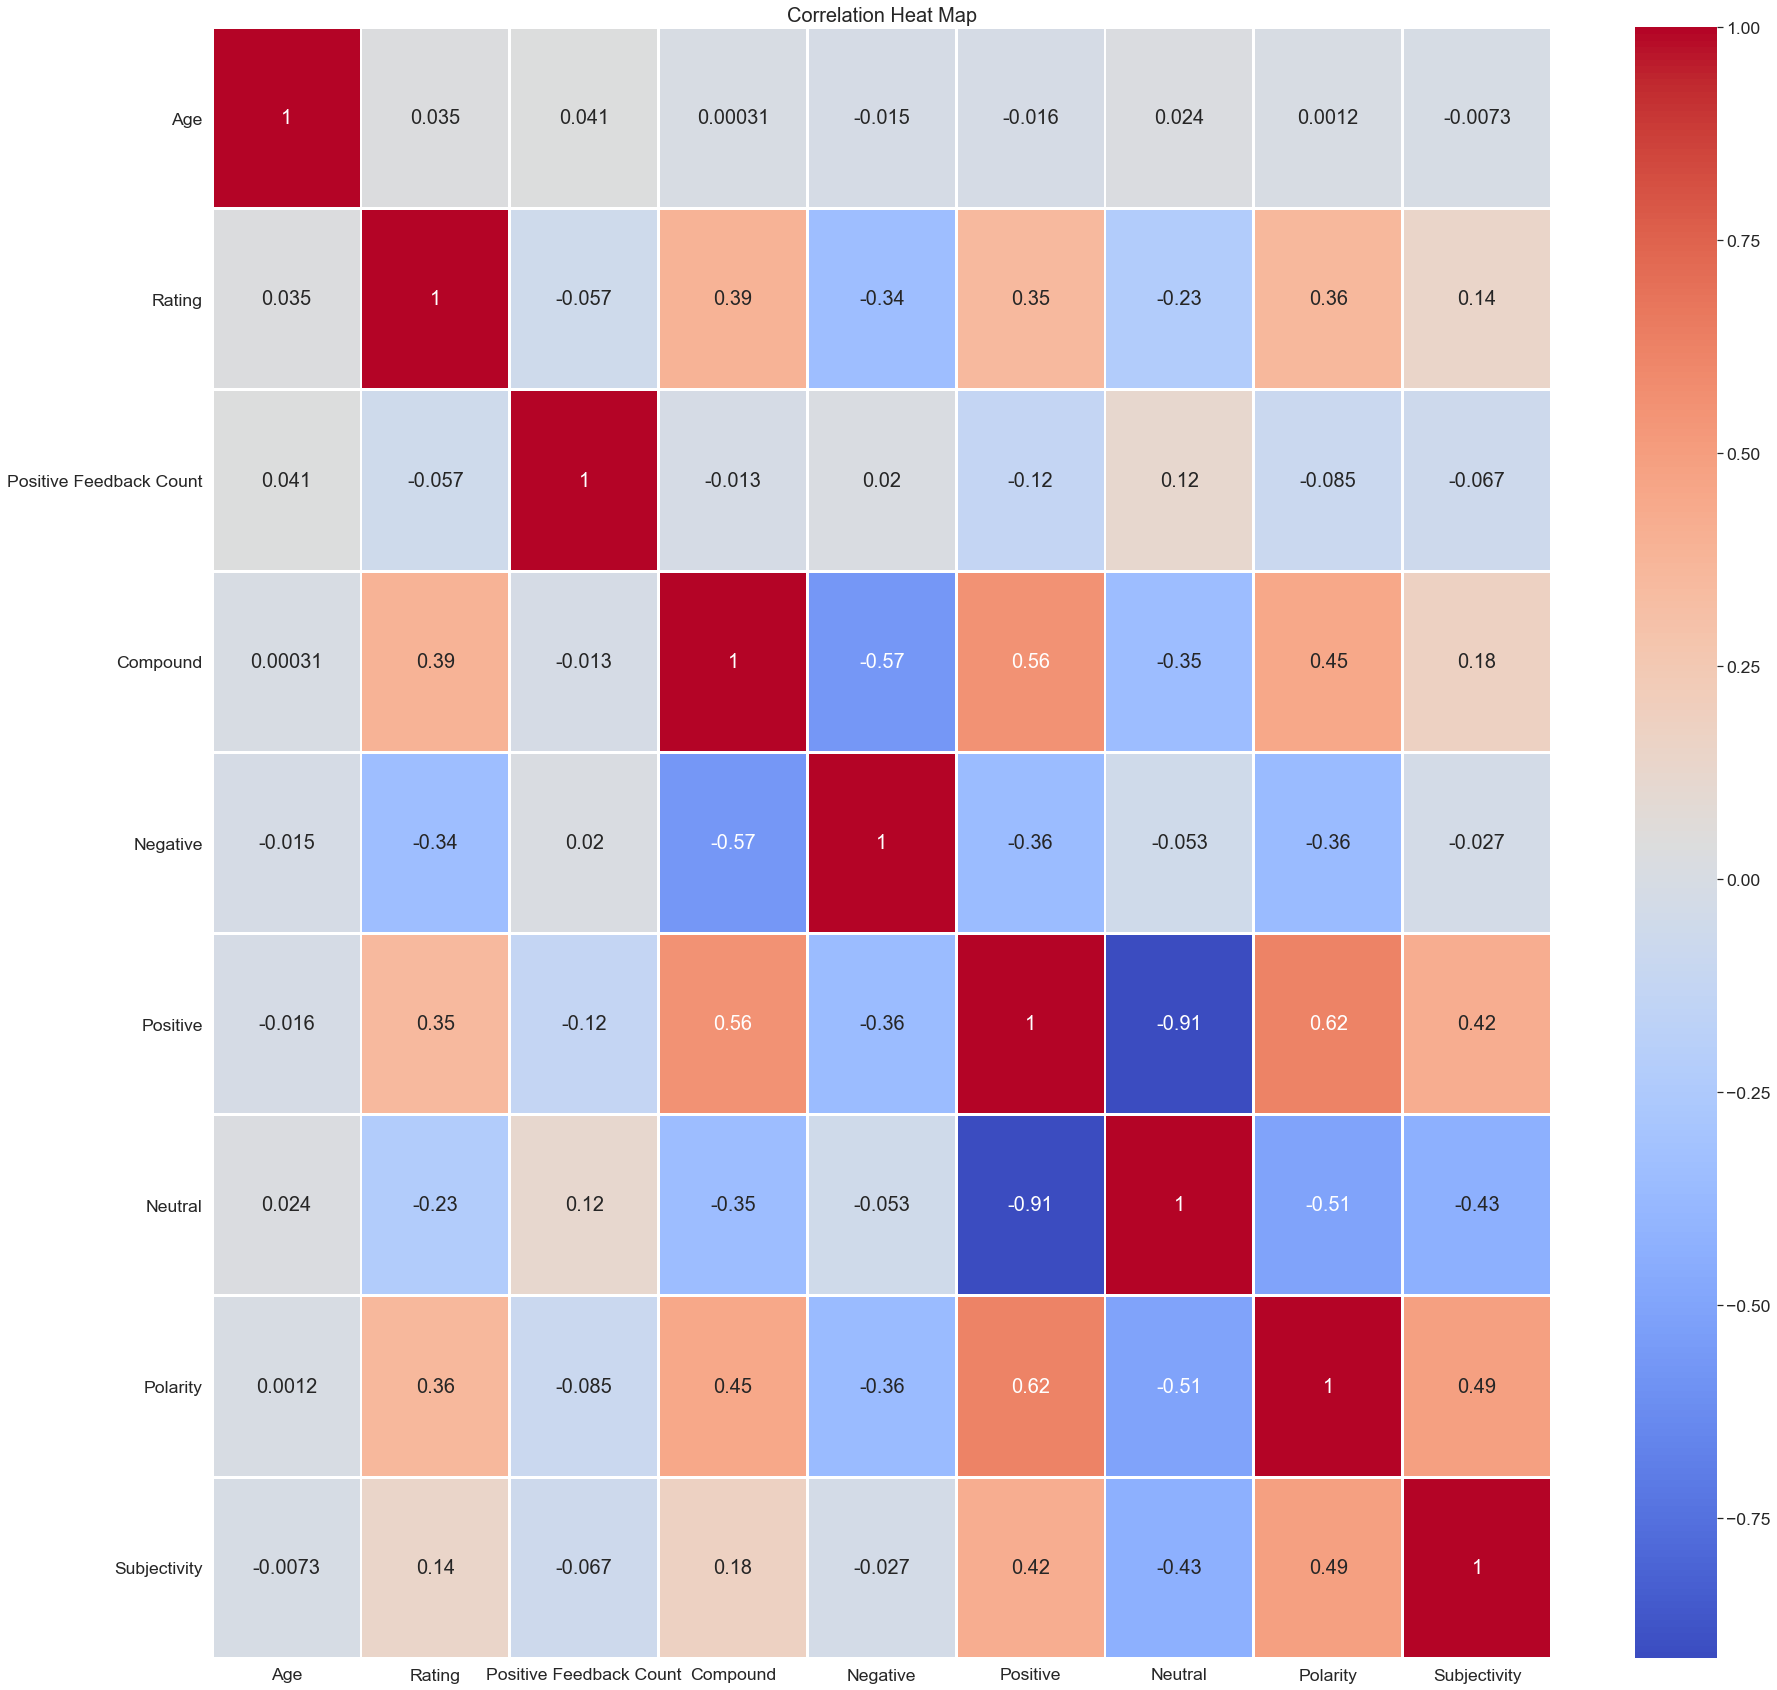

In [188]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots()
fig.set_size_inches(30, 30)
sns.heatmap(df_f.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2, annot_kws={"size": 20})
plt.title('Correlation Heat Map', fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Department Name'>

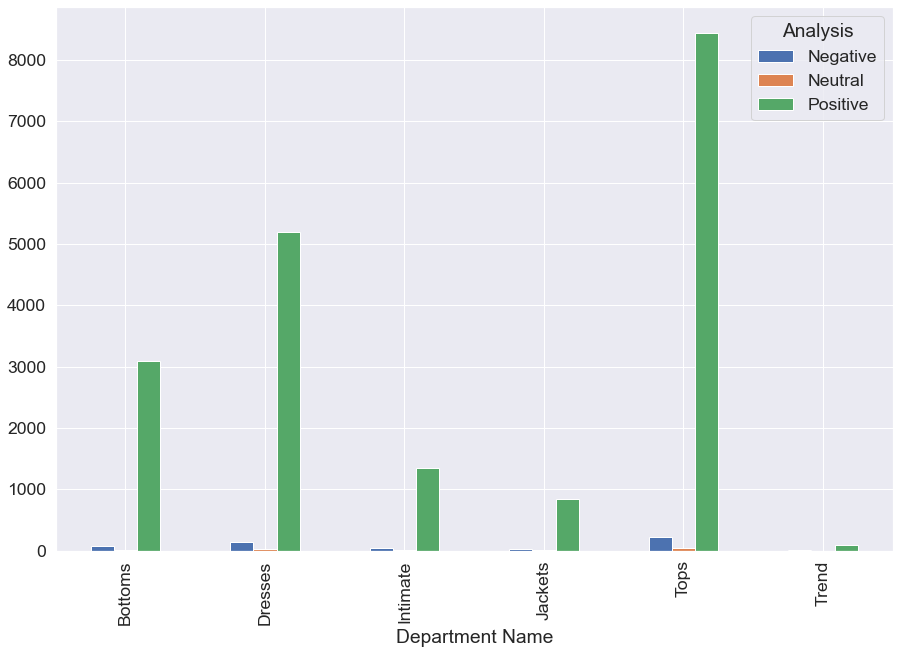

In [191]:
review_sentiment = df_f.groupby(['Department Name', 'Analysis']).Analysis.count().unstack()
review_sentiment.plot(kind='bar')

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [194]:
vectorizer = TfidfVectorizer (max_features=1000, min_df=7, max_df=0.7, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(df_clothes["Review Text"]).toarray()

In [198]:
labels = df_clothes["Analysis"].values

In [199]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.5, random_state=0)

# Random FOrest

In [200]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [201]:
y_pred = text_classifier.predict(X_test)

In [203]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   4    0  277]
 [   1    3   59]
 [   6    1 9480]]
              precision    recall  f1-score   support

    Negative       0.36      0.01      0.03       281
     Neutral       0.75      0.05      0.09        63
    Positive       0.97      1.00      0.98      9487

    accuracy                           0.97      9831
   macro avg       0.69      0.35      0.37      9831
weighted avg       0.95      0.97      0.95      9831

0.9650086461194182


# KNN 

In [215]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.5, random_state=0)

In [216]:
X_train.shape

(9831, 1000)

In [217]:
y_train.shape

(9831,)

In [218]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [223]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   5    0  276]
 [   0    0   63]
 [  11    2 9474]]
              precision    recall  f1-score   support

    Negative       0.31      0.02      0.03       281
     Neutral       0.00      0.00      0.00        63
    Positive       0.97      1.00      0.98      9487

    accuracy                           0.96      9831
   macro avg       0.43      0.34      0.34      9831
weighted avg       0.94      0.96      0.95      9831

0.9641948937035907


In [238]:
df_model1 = df_f[['Age', 'Rating', 'Positive Feedback Count',
       'Division Name', 'Department Name', 'Class Name', 'Compound',
       'Negative', 'Positive', 'Neutral', 'Analysis', 'Polarity','Subjectivity']]

In [244]:
target = df_model1.Analysis

In [243]:
df_model1.head()

,Age,Rating,Positive Feedback Count,Division Name,Department Name,Class Name,Compound,Negative,Positive,Neutral,Analysis,Polarity,Subjectivity
2,60,3,0,General,Dresses,Dresses,0.9117,0.036,0.259,0.705,Positive,0.079459,0.345866
3,50,5,0,General Petite,Bottoms,Pants,0.9511,0.163,0.631,0.206,Positive,0.550000,0.625000
4,47,5,6,General,Tops,Blouses,0.9213,0.000,0.523,0.477,Positive,0.617188,0.658333
5,49,2,4,General,Dresses,Dresses,0.9153,0.000,0.257,0.743,Positive,0.150000,0.542857
6,39,5,1,General Petite,Tops,Knits,0.8439,0.000,0.159,0.841,Positive,0.160500,0.529333


In [245]:
cat_columns = ['Division Name', 'Department Name', 'Class Name']
cat_dummies = [col for col in df_model1
               if "__" in col 
               and col.split("__")[0] in cat_columns]
processed = pd.get_dummies(df_model1, prefix_sep="__",
                              columns=cat_columns)

In [252]:
X_train, X_val, y_train, y_val = train_test_split(processed.loc[:, processed.columns != 'Analysis'],
                                                    target, test_size =0.50, random_state=22, stratify=processed['Analysis'])

# Random FOrest

In [253]:
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [254]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   3    0  278]
 [   0    0   63]
 [   9    0 9478]]
              precision    recall  f1-score   support

    Negative       0.25      0.01      0.02       281
     Neutral       0.00      0.00      0.00        63
    Positive       0.97      1.00      0.98      9487

    accuracy                           0.96      9831
   macro avg       0.41      0.34      0.33      9831
weighted avg       0.94      0.96      0.95      9831

0.9643983318075475


C:\Users\glori\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  else:
C:\Users\glori\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  else:
C:\Users\glori\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  else:
